# 1. Importer les packages

In [145]:
# Importer les packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import joblib
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
import warnings
warnings.filterwarnings('ignore')

# Charger des donnees

In [146]:

# Define the file names (ensure the Excel file is in the current working directory)
read_excel = 'Mining_Dataset.xlsx'
data = pd.read_excel(read_excel)

# Correct the file extension from .cvs to .csv
csv = 'Mining_Dataset.csv'
data.to_csv(csv, index=False)

# 3. Analyse de données

In [147]:
data.head(10)

,N°,Site,Longitude,Latitude,Altitude,Ic,Classe_Ic
0,1,Tumbwe,27.398758,-11.479370,1356.0,1.032063,Dur
1,2,Tumbwe,27.398610,-11.478151,1354.0,27.390744,Dur
2,3,Tumbwe,27.399395,-11.476759,1354.0,1.541371,Dur
3,4,Tumbwe,27.399987,-11.475205,1354.0,1.081573,Dur
4,5,Tumbwe,27.400558,-11.474226,1353.0,1.364352,Dur
5,6,Tumbwe,27.399462,-11.473477,1352.0,1.193886,Dur
6,7,Tumbwe,27.397897,-11.472683,1353.0,1.470506,Dur
7,8,Tumbwe,27.396160,-11.473234,1352.0,1.956046,Dur
8,9,Tumbwe,27.395137,-11.473340,1352.0,0.715264,Terne
9,10,Tumbwe,27.394444,-11.474650,1350.0,0.653490,Terne


In [148]:
data.tail()

,N°,Site,Longitude,Latitude,Altitude,Ic,Classe_Ic
5242,5243,Gambela,27.480643,-11.614738,1285.0,1.695698,Dur
5243,5244,Gambela,27.480092,-11.614721,1284.0,3.926087,Dur
5244,5245,Gambela,27.477062,-11.612963,1287.0,1.738089,Dur
5245,5246,Gambela,27.476266,-11.613941,1279.0,11.160760,Dur
5246,5247,Gambela,27.477834,-11.614092,1284.0,5.506705,Dur


In [149]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5247 entries, 0 to 5246
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   N°         5247 non-null   int64  
 1   Site       5247 non-null   object 
 2   Longitude  5247 non-null   float64
 3   Latitude   5247 non-null   float64
 4   Altitude   5247 non-null   float64
 5   Ic         5247 non-null   float64
 6   Classe_Ic  5247 non-null   object 
dtypes: float64(4), int64(1), object(2)
memory usage: 287.1+ KB


In [150]:
data.shape

(5247, 7)

In [151]:
data.columns

Index(['N°', 'Site', 'Longitude', 'Latitude', 'Altitude', 'Ic', 'Classe_Ic'], dtype='object')

In [152]:
data.isnull().sum()

N°           0
Site         0
Longitude    0
Latitude     0
Altitude     0
Ic           0
Classe_Ic    0
dtype: int64

# Pretraitement des donnees

In [153]:
# dropping passed values
drop_Dur = data[data['Classe_Ic'] == 'Dur'].iloc[ :625 , :]
drop_Dur 

,N°,Site,Longitude,Latitude,Altitude,Ic,Classe_Ic
0,1,Tumbwe,27.398758,-11.479370,1356.000,1.032063,Dur
1,2,Tumbwe,27.398610,-11.478151,1354.000,27.390744,Dur
2,3,Tumbwe,27.399395,-11.476759,1354.000,1.541371,Dur
3,4,Tumbwe,27.399987,-11.475205,1354.000,1.081573,Dur
4,5,Tumbwe,27.400558,-11.474226,1353.000,1.364352,Dur
...,...,...,...,...,...,...,...
808,809,Tumbwe,27.394227,-11.474065,1348.248,1.048759,Dur
810,811,Tumbwe,27.394278,-11.474105,1348.453,1.032063,Dur
811,812,Tumbwe,27.394311,-11.474129,1348.360,27.390744,Dur
812,813,Tumbwe,27.394341,-11.474153,1348.697,1.541371,Dur


In [154]:
drop_Terne = data[data['Classe_Ic'] == 'Terne']
drop_Terne

,N°,Site,Longitude,Latitude,Altitude,Ic,Classe_Ic
8,9,Tumbwe,27.395137,-11.473340,1352.000,0.715264,Terne
9,10,Tumbwe,27.394444,-11.474650,1350.000,0.653490,Terne
11,12,Tumbwe,27.393726,-11.475818,1344.000,0.559695,Terne
29,30,Tumbwe,27.388280,-11.471170,1342.000,0.669784,Terne
38,39,Tumbwe,27.390620,-11.474792,1338.417,0.715264,Terne
...,...,...,...,...,...,...,...
4685,4686,MUTSHATSHA,24.458400,-10.638600,1240.000,0.663000,Terne
4710,4711,QUARTIER MUSUMBA,27.446298,-11.695117,1204.000,0.720000,Terne
4713,4714,QUARTIER MUSUMBA,27.449804,-11.701423,1214.000,0.510000,Terne
4717,4718,QUARTIER MUSUMBA,27.462209,-11.706052,1205.000,0.710000,Terne


In [155]:
drop_Mi_Dur = data[data['Classe_Ic'] == 'Mi-dur']
drop_Mi_Dur

,N°,Site,Longitude,Latitude,Altitude,Ic,Classe_Ic
15,16,Tumbwe,27.390718,-11.474095,1341.000,0.757955,Mi-dur
27,28,Tumbwe,27.385035,-11.469725,1334.000,0.771537,Mi-dur
45,46,Tumbwe,27.390788,-11.474910,1338.771,0.757955,Mi-dur
57,58,Tumbwe,27.391128,-11.475153,1338.915,0.771537,Mi-dur
75,76,Tumbwe,27.391638,-11.475514,1338.924,0.757955,Mi-dur
...,...,...,...,...,...,...,...
4712,4713,QUARTIER MUSUMBA,27.444450,-11.698303,1222.000,0.960000,Mi-dur
4718,4719,QUARTIER MUSUMBA,27.467567,-11.711234,1202.000,0.770000,Mi-dur
4719,4720,QUARTIER MUSUMBA,27.461638,-11.710222,1206.000,0.950000,Mi-dur
4723,4724,QUARTIER MUSUMBA,27.453713,-11.706925,1196.000,0.950000,Mi-dur


In [156]:
drop_Liquide = data[data['Classe_Ic'] == 'Liquide']
drop_Liquide

,N°,Site,Longitude,Latitude,Altitude,Ic,Classe_Ic
20,21,Tumbwe,27.389360,-11.471787,1341.0000,-0.794529,Liquide
50,51,Tumbwe,27.390919,-11.475003,1338.5070,-0.794529,Liquide
80,81,Tumbwe,27.391808,-11.475637,1339.0120,-0.794529,Liquide
110,111,Tumbwe,27.392803,-11.476314,1340.4610,-0.794529,Liquide
140,141,Tumbwe,27.393934,-11.476886,1343.5050,-0.794529,Liquide
...,...,...,...,...,...,...,...
5193,5194,KINSEVERE,27.500284,-11.583934,1188.6369,-35.219849,Liquide
5203,5204,KINSEVERE,27.499655,-11.583269,1187.8608,-35.219849,Liquide
5213,5214,KINSEVERE,27.500588,-11.582730,1186.8692,-35.219849,Liquide
5223,5224,KINSEVERE,27.501601,-11.581927,1185.9133,-35.219849,Liquide


In [157]:
dt_concat = pd.concat([drop_Dur,drop_Terne,drop_Mi_Dur,drop_Liquide])
dt_concat

,N°,Site,Longitude,Latitude,Altitude,Ic,Classe_Ic
0,1,Tumbwe,27.398758,-11.479370,1356.0000,1.032063,Dur
1,2,Tumbwe,27.398610,-11.478151,1354.0000,27.390744,Dur
2,3,Tumbwe,27.399395,-11.476759,1354.0000,1.541371,Dur
3,4,Tumbwe,27.399987,-11.475205,1354.0000,1.081573,Dur
4,5,Tumbwe,27.400558,-11.474226,1353.0000,1.364352,Dur
...,...,...,...,...,...,...,...
5193,5194,KINSEVERE,27.500284,-11.583934,1188.6369,-35.219849,Liquide
5203,5204,KINSEVERE,27.499655,-11.583269,1187.8608,-35.219849,Liquide
5213,5214,KINSEVERE,27.500588,-11.582730,1186.8692,-35.219849,Liquide
5223,5224,KINSEVERE,27.501601,-11.581927,1185.9133,-35.219849,Liquide


In [158]:

dt_concat['Classe_Ic'].unique()

array(['Dur', 'Terne', 'Mi-dur', 'Liquide'], dtype=object)

In [159]:
dt_concat['Classe_Ic'].value_counts()

Classe_Ic
Terne      628
Dur        625
Mi-dur     325
Liquide    201
Name: count, dtype: int64

In [160]:
labeling = LabelEncoder()

In [161]:
dt_concat['Site'] = labeling.fit_transform(dt_concat['Site'])
dt_concat['Classe_Ic'] = labeling.fit_transform(dt_concat['Classe_Ic'])

In [162]:
dt_concat.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1779 entries, 0 to 5233
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   N°         1779 non-null   int64  
 1   Site       1779 non-null   int64  
 2   Longitude  1779 non-null   float64
 3   Latitude   1779 non-null   float64
 4   Altitude   1779 non-null   float64
 5   Ic         1779 non-null   float64
 6   Classe_Ic  1779 non-null   int64  
dtypes: float64(4), int64(3)
memory usage: 111.2 KB


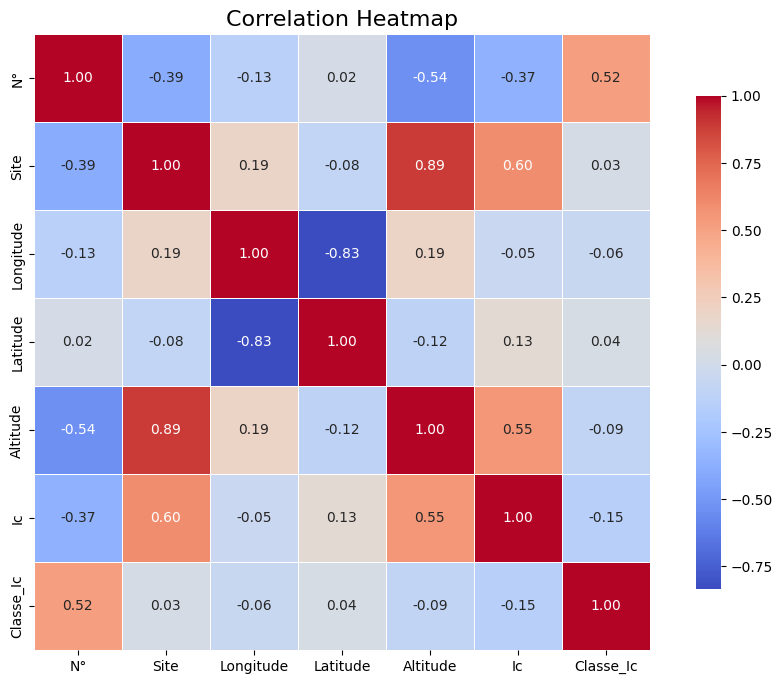

In [163]:

plt.figure(figsize=(12, 8))
sns.heatmap(
    dt_concat.corr(),
    annot=True,            
    fmt=".2f",               
    cmap='coolwarm',          
    square=True,              
    linewidths=0.5,         
    cbar_kws={"shrink": .8},
)
plt.title('Correlation Heatmap', fontsize=16)
plt.show()

# 5. Diviser les donnees : Train et Test

In [164]:
# Diviser les donnees : Train et Test
X = dt_concat.iloc [:, :-1]
y = dt_concat.iloc[:, -1]
y = to_categorical(y, num_classes=4)

In [165]:
# Split the data into training and testing sets if not already done
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [166]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [167]:
X_train

array([[ 0.08338493,  0.18855599,  0.02335111,  0.0521671 , -0.12931647,
        -0.05108346],
       [ 1.25023979,  0.18855599,  0.05133495, -0.01672618, -0.01800436,
        -0.04922037],
       [-0.96678444,  0.18855599,  0.08441165, -0.05493728,  0.48094154,
         0.07695285],
       ...,
       [ 0.01819751,  0.18855599,  0.01721952,  0.0612696 , -0.20475408,
        -0.04922037],
       [ 0.88910147,  0.18855599,  0.04998072, -0.04277662, -0.02250908,
        -0.03913855],
       [ 1.31542721,  0.18855599,  0.02470947, -0.00964596, -0.23984514,
        -0.05108346]])

In [168]:
y_train

array([[0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       ...,
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]])

In [169]:
# Print the shapes of the training and testing sets
print("X-train Shape:", X_train.shape)
print("y-train Shape:", y_train.shape)
print("X-test Shape:", X_test.shape)
print("y-test Shape:", y_test.shape)

X-train Shape: (1423, 6)
y-train Shape: (1423, 4)
X-test Shape: (356, 6)
y-test Shape: (356, 4)


# 6. Construire le Shallow Neural Network

In [170]:
# Creer une instance de la Classe Sequential
model = Sequential()

In [171]:
# Creer une instance de la Classe Sequential
model = Sequential()

# Ajout de la premiere couche
model.add(Dense(10, input_shape=(6,), activation='relu'))

# Ajout de la deuxieme couche intermediaire
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

# Ajout de la troisieme couche intermediaire
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))

# Ajout de la qautriem couche intermediaire
model.add(Dense(32, activation='relu'))

# Ajout de la couche de Sortie
model.add(Dense(4, activation='softmax'))

# Compiler le model
model.compile(optimizer=Adam(learning_rate=0.01), loss='categorical_crossentropy', metrics=['accuracy'])

# Affichage de l'architecture du reseau de neurone
model.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_23 (Dense)                │ (None, 10)             │            70 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 128)            │         1,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 4)              │           132 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,946 (46.66 KB)

 Trainable params: 11,946 (46.66 KB)

 Non-trainable params: 0 (0.00 B)

In [172]:
# Entrainement du modele
history = model.fit(X_train, y_train, epochs=150, verbose=1, validation_data=(X_test, y_test))

Epoch 1/150
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5434 - loss: 1.1350 - val_accuracy: 0.6882 - val_loss: 0.8137
Epoch 2/150
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6527 - loss: 0.8503 - val_accuracy: 0.6433 - val_loss: 0.8019
Epoch 3/150
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6918 - loss: 0.6986 - val_accuracy: 0.8090 - val_loss: 0.3887
Epoch 4/150
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8005 - loss: 0.4121 - val_accuracy: 0.8174 - val_loss: 0.3369
Epoch 5/150
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8107 - loss: 0.3832 - val_accuracy: 0.8146 - val_loss: 0.3335
Epoch 6/150
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7996 - loss: 0.3857 - val_accuracy: 0.8230 - val_loss: 0.2918
Epoch 7/150
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8149 - loss: 0.3403 - val_accuracy: 0.8596 - val_loss: 0.2480
Epoch 8/150
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8714 - loss: 0.2792 - val_accuracy: 0.8230 - v

In [173]:
train_accuracy = history.history['accuracy']
train_loss = history.history['loss']

val_accuracy = history.history['val_accuracy']
val_loss = history.history['val_loss']

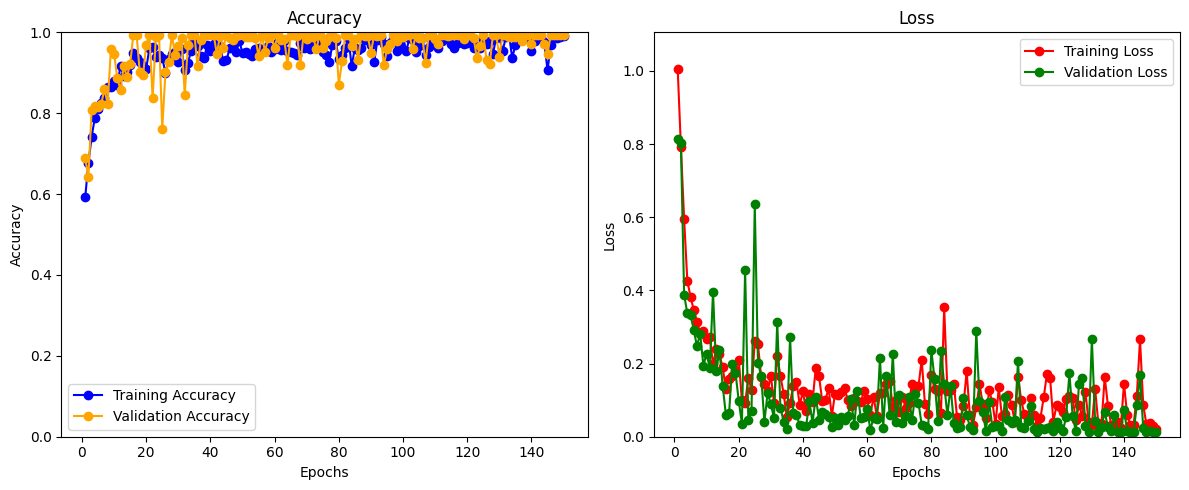

In [174]:
import matplotlib.pyplot as plt

# Tracer l'exactitude et la perte d'entraînement et de validation
plt.figure(figsize=(12, 5))

# Exactitude
plt.subplot(1, 2, 1)
plt.plot(range(1, len(train_accuracy) + 1), train_accuracy, color='blue', marker='o', label='Training Accuracy')
plt.plot(range(1, len(val_accuracy) + 1), val_accuracy, color='orange', marker='o', label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy')
plt.ylim(0, 1)  # Limiter l'axe Y entre 0 et 1 pour l'exactitude
plt.legend()

# Perte
plt.subplot(1, 2, 2)
plt.plot(range(1, len(train_loss) + 1), train_loss, color='red', marker='o', label='Training Loss')
plt.plot(range(1, len(val_loss) + 1), val_loss, color='green', marker='o', label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss')
plt.ylim(0, max(max(train_loss), max(val_loss)) * 1.1)  # Ajuster l'axe Y pour la perte
plt.legend()

# Afficher les graphiques
plt.tight_layout()
plt.show()

# 8. Evaluer le modèle

In [175]:
# Supposons que 'model' est votre modèle entraîné et 'X_test' est votre ensemble de test
y_pred = model.predict(X_test)
# Afficher les prédictions
print(y_pred)

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
[[4.4493571e-12 3.6405520e-06 5.5133369e-05 9.9994111e-01]
 [1.0000000e+00 0.0000000e+00 7.8739545e-23 2.5846962e-30]
 [1.3820962e-05 5.7111279e-06 9.9526125e-01 4.7192713e-03]
 ...
 [5.1382019e-09 7.8692428e-06 2.7859062e-03 9.9720627e-01]
 [1.5959410e-21 1.8306907e-06 6.4657735e-10 9.9999821e-01]
 [1.4167572e-05 5.1901297e-06 9.9590355e-01 4.0771062e-03]]


# Étape 6 : Visualiser l’evolution de l’entrainement du réseau de neurone

In [176]:
epoch_accuracy = history.history['accuracy']
epoch_loss = history.history['loss']

epoch_val_accuracy = history.history['val_accuracy']
epoch_val_loss = history.history['val_loss']

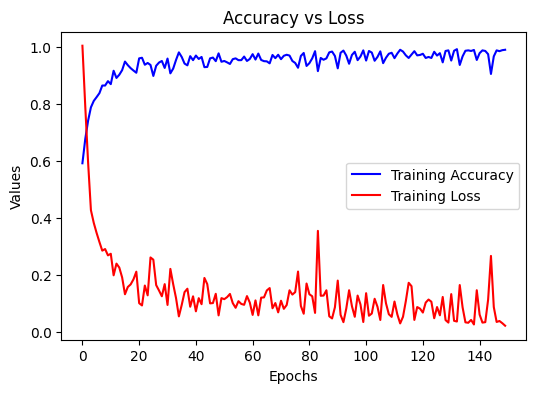

In [177]:
plt.figure(figsize=(6, 4))
plt.plot(range(0, len(epoch_accuracy)), epoch_accuracy, color='blue', label='Training Accuracy')
plt.plot(range(0, len(epoch_loss)), epoch_loss, color='red', label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Values')
plt.title('Accuracy vs Loss')
plt.legend()
plt.show()

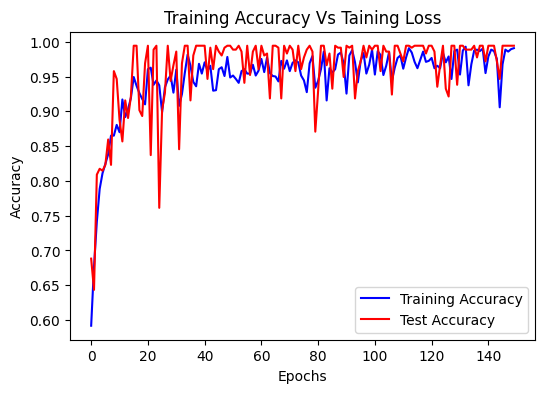

In [178]:
plt.figure(figsize=(6, 4))
plt.plot(range(0, len(epoch_accuracy)), epoch_accuracy, color='blue', label='Training Accuracy')
plt.plot(range(0, len(epoch_val_accuracy)), epoch_val_accuracy, color='red', label='Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training Accuracy Vs Taining Loss')
plt.legend()
plt.show()

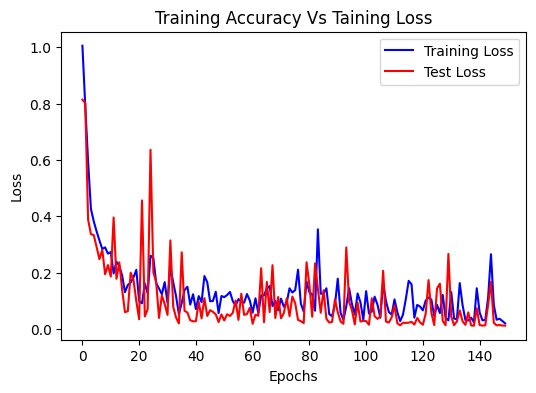

In [179]:
plt.figure(figsize=(6, 4))
plt.plot(range(0, len(epoch_loss)), epoch_loss, color='blue', label='Training Loss')
plt.plot(range(0, len(epoch_val_loss)), epoch_val_loss, color='red', label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Accuracy Vs Taining Loss')
plt.legend()
plt.show()

# Étape 7 : Evaluer le modèle

In [180]:
model.evaluate(X_test, y_test)

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9894 - loss: 0.0175     


[0.012449102476239204, 0.9943820238113403]

# 8. Sauvegarder le modèle entrainé

In [181]:
model.save('model_dnn.h5')

In [182]:
joblib.dump(scaler, "scaler_ic.pkl")

['scaler_ic.pkl']

In [183]:
predictions = model.predict(X_test)

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


In [184]:
predictions

array([[4.4493571e-12, 3.6405520e-06, 5.5133369e-05, 9.9994111e-01],
       [1.0000000e+00, 0.0000000e+00, 7.8739545e-23, 2.5846962e-30],
       [1.3820962e-05, 5.7111279e-06, 9.9526125e-01, 4.7192713e-03],
       ...,
       [5.1382019e-09, 7.8692428e-06, 2.7859062e-03, 9.9720627e-01],
       [1.5959410e-21, 1.8306907e-06, 6.4657735e-10, 9.9999821e-01],
       [1.4167572e-05, 5.1901297e-06, 9.9590355e-01, 4.0771062e-03]],
      dtype=float32)

In [185]:
#predicted_classes
predicted_classes = predictions.argmax(axis=1)

print("Prédictions :", predicted_classes)

Prédictions : [3 0 2 3 0 0 0 3 2 3 1 0 3 0 3 3 3 0 3 3 0 0 3 3 3 0 3 0 0 2 3 3 2 0 0 1 3
 0 3 2 0 2 0 3 2 3 2 1 1 1 2 0 3 2 2 3 0 0 0 3 1 2 0 0 0 1 0 0 0 0 3 3 3 0
 3 2 2 0 3 1 0 0 3 0 2 0 2 0 1 3 0 3 3 0 0 0 3 0 0 0 1 1 1 3 0 3 0 3 1 3 3
 0 3 0 2 0 2 0 2 0 0 0 2 2 1 1 2 2 2 3 2 0 3 2 2 0 0 3 2 1 3 0 0 3 0 0 3 3
 3 3 0 0 0 0 2 2 0 2 1 2 0 1 0 0 0 3 3 0 3 3 2 0 2 2 0 3 0 2 3 0 0 3 0 3 3
 1 0 2 0 3 0 2 0 0 3 3 3 0 1 2 0 0 3 0 3 3 0 3 3 2 0 3 0 0 3 3 2 2 2 2 0 2
 0 1 0 2 3 1 1 3 1 0 2 3 0 3 2 2 3 3 2 2 1 1 1 0 2 3 2 0 0 3 2 2 2 3 3 1 1
 0 3 1 2 2 3 0 3 2 3 0 2 0 3 0 3 3 3 3 0 0 0 0 0 0 3 3 1 3 3 0 1 0 2 0 2 0
 3 3 0 0 3 3 1 1 0 2 0 0 3 0 0 3 1 0 3 3 0 2 2 0 3 3 0 0 3 1 3 3 0 3 0 2 0
 3 3 0 0 1 0 3 3 0 1 3 2 0 3 1 0 0 1 0 3 3 3 2]


# 9. Simple Prediction

In [186]:
dt_concat.head()

,N°,Site,Longitude,Latitude,Altitude,Ic,Classe_Ic
0,1,6,27.398758,-11.479370,1356.0,1.032063,0
1,2,6,27.398610,-11.478151,1354.0,27.390744,0
2,3,6,27.399395,-11.476759,1354.0,1.541371,0
3,4,6,27.399987,-11.475205,1354.0,1.081573,0
4,5,6,27.400558,-11.474226,1353.0,1.364352,0


In [187]:
# Une simple prediction 

# Donnée d'entrée (5 features)
# Ensure the input has 6 features by adding a placeholder value (e.g., 0) for the missing feature
X_test_3 = np.array([[2, 27.502679, -11.581215, 1183.3166, -35.219849, 0]])
#X_test_2 = np.array([[10, 27.398758, -11.479370, 1356.0, 1.03206]])


# N'oublie pas de scaler aussi cette entrée
X_test_3 = scaler.transform(X_test_3)
print(X_test_3)

# Prédiction
prediction = model.predict(X_test_3)
predicted_class = prediction.argmax()

print("Classe prédite :", predicted_class)

[[-1.13431612e+00  3.18890782e+01 -1.84329377e+02  1.57187396e+04
  -4.48344724e+01 -1.25806249e-01]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Classe prédite : 2


In [188]:
# Affichage des résultats
probs_percent = prediction[0]
#probs_percent = prediction[0] * 100
probs_rounded = np.round(probs_percent, 2)

print(f"Classe prédite : {predicted_class}")
print("Probabilités par classe (%):", probs_rounded)

Classe prédite : 2
Probabilités par classe (%): [0.01 0.12 0.54 0.33]
